# Handwritten Digit Recoginition

<a href="https://www.kaggle.com/code/himiknainwal/latest-character-recognition-let/input?select=A_Z+Handwritten+Data.csv">Dataset Link</a>

In [1]:
import cv2 as cv
import numpy as np
import pandas as pd
from keras.models import load_model
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Load Dataset

In [2]:
data = pd.read_csv('A_Z Handwritten Data.csv')
data.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Data Preprocessing

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372450 entries, 0 to 372449
Columns: 785 entries, 0 to 0.648
dtypes: int64(785)
memory usage: 2.2 GB


In [4]:
data.shape

(372450, 785)

In [5]:
data.isnull().sum()

0        0
0.1      0
0.2      0
0.3      0
0.4      0
        ..
0.644    0
0.645    0
0.646    0
0.647    0
0.648    0
Length: 785, dtype: int64

In [6]:
my_data = data.values
my_data

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [25,  0,  0, ...,  0,  0,  0],
       [25,  0,  0, ...,  0,  0,  0],
       [25,  0,  0, ...,  0,  0,  0]], dtype=int64)

In [7]:
X = my_data[:,1:]
y = my_data[:,:1]
print(X.shape)
print(y.shape)

(372450, 784)
(372450, 1)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

#reshaping to 28*28 pixels from 784
X_train = np.reshape(X_train,(X_train.shape[0],28,28))
X_test = np.reshape(X_test,(X_test.shape[0],28,28))

In [9]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(297960, 28, 28)
(74490, 28, 28)
(297960, 1)
(74490, 1)


# Data Visualization

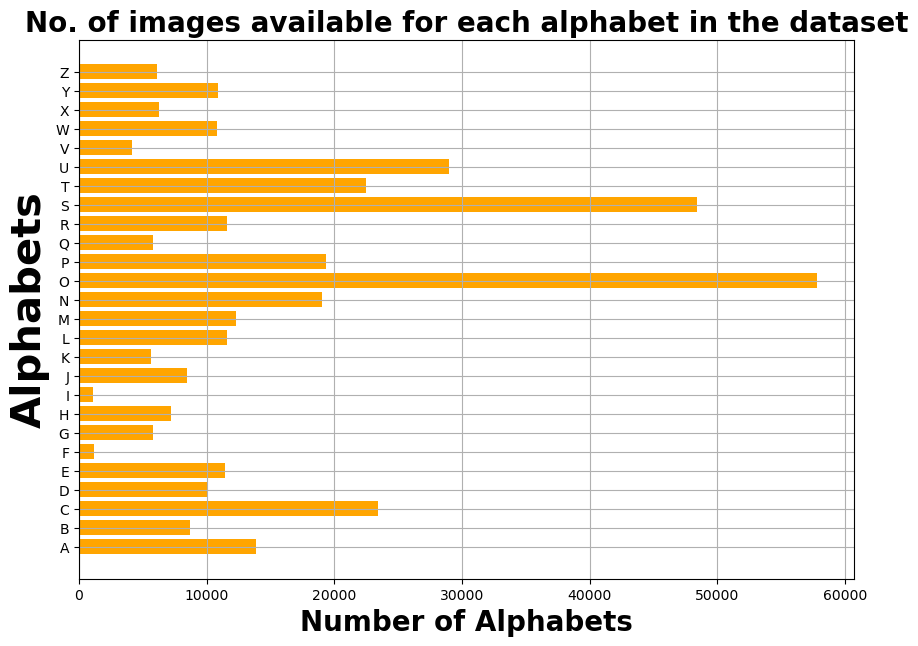

In [10]:
# Plotting the number of alphabets in the dataset
# 1): Firstly we create a count list of 26 entries of zeroes and then count each label in y and append them in the count list
# 2): Now we create a list – alphabets containing all the characters
# 3): After that using the count & alphabets lists we draw the horizontal bar plot.

count = np.zeros(26, dtype = 'int') #creating zeroes array

#counting each label
for i in y:
    count[i] += 1

alphabets = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

plt.figure(figsize=(10,7))
plt.barh(alphabets, count, color = "orange")
plt.xlabel("Number of Alphabets",fontsize = 20, fontweight = 'bold')
plt.ylabel("Alphabets",fontsize = 30, fontweight = 'bold')
plt.title("No. of images available for each alphabet in the dataset", fontsize = 20, fontweight = 'bold', color = "black")
plt.grid()
plt.show()

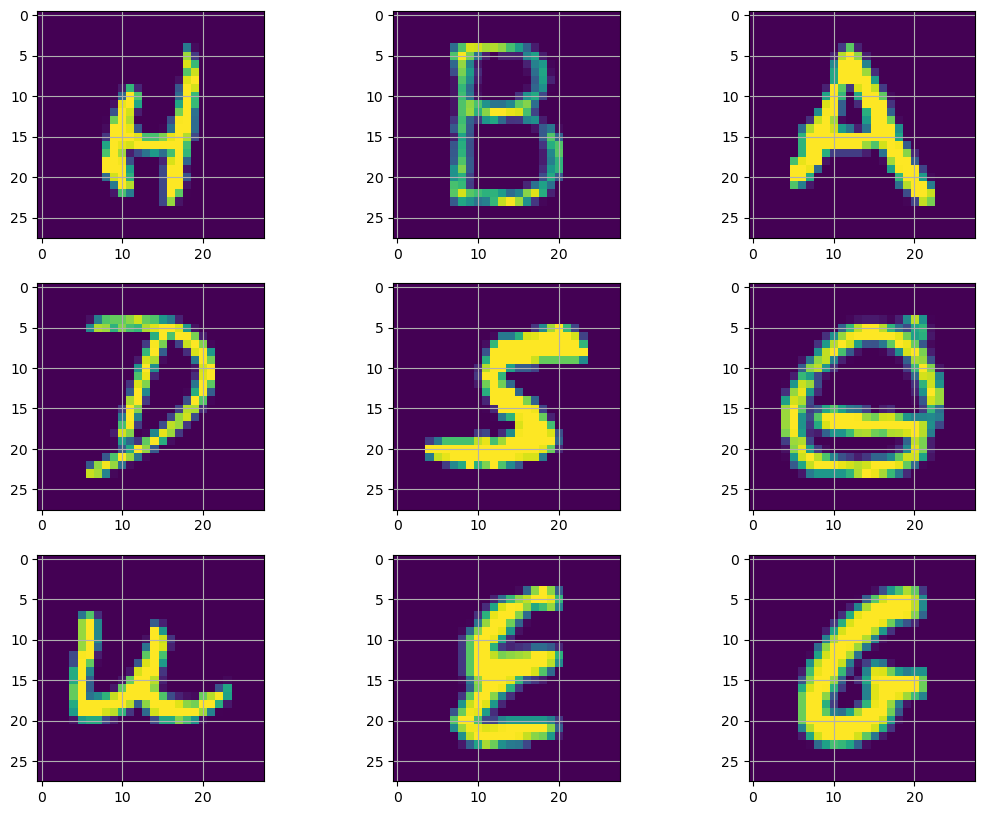

In [11]:
img_list = shuffle(X_train[:1000])
fig,ax = plt.subplots(3,3,figsize=(13,10))
axes = ax.flatten()
for i in range(9):
    axes[i].imshow(img_list[i])
    axes[i].grid()
plt.show()

In [12]:
# Now we reshape the train & test image dataset so that they can be put in the model.

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2],1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2],1)

print(X_train.shape)
print(X_test.shape)

(297960, 28, 28, 1)
(74490, 28, 28, 1)


In [13]:
#Normalizing the values
X_train = X_train/255.
X_test = X_test/255.

In [14]:
categorical_ytrain = to_categorical(y_train, num_classes = 26, dtype = 'int')
print("New shape of train labels:", categorical_ytrain.shape)

categorical_ytest = to_categorical(y_test, num_classes = 26, dtype = 'int')
print("New shape of test labels:", categorical_ytest.shape)

New shape of train labels: (297960, 26)
New shape of test labels: (74490, 26)


In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = Sequential([])

#First Conv1D layer
model.add(Conv2D(32,kernel_size = (3,3),activation = 'relu',input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size = (2,2),strides = 2))

#Second Conv1D layer
model.add(Conv2D(filters = 64, kernel_size = (3,3),activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2))

#Third Conv1D layer
model.add(Conv2D(filters = 128, kernel_size = (3,3),activation = 'relu', padding = 'valid'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2))

#Flatten layer
model.add(Flatten())

#Dense layer 1
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))

#Dense layer 2
model.add(Dense(64,activation = 'relu'))

#Final layer of 26 nodes
model.add(Dense(26,activation = 'softmax'))

#Define the loss function to be categorical cross-entropy since it is a multi-classification problem:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [18]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.001) 

In [19]:
history = model.fit(x = X_train, y = categorical_ytrain, epochs = 3, callbacks=[es], validation_data = (X_test,categorical_ytest))

Epoch 1/3
9312/9312 [==============================] - 388s 41ms/step - loss: 0.1506 - accuracy: 0.9571 - val_loss: 0.0612 - val_accuracy: 0.9827
Epoch 2/3
9312/9312 [==============================] - 345s 37ms/step - loss: 0.0611 - accuracy: 0.9830 - val_loss: 0.0443 - val_accuracy: 0.9880
Epoch 3/3
9312/9312 [==============================] - 314s 34ms/step - loss: 0.0466 - accuracy: 0.9868 - val_loss: 0.0463 - val_accuracy: 0.9877


In [20]:
#evaluating model on test dataset
model.evaluate(X_test,categorical_ytest)

2328/2328 [==============================] - 24s 10ms/step - loss: 0.0463 - accuracy: 0.9877


[0.0462740994989872, 0.9877030253410339]

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

In [22]:
print("The validation accuracy is :", history.history['val_accuracy'][-1])
print("The training accuracy is :", history.history['accuracy'][-1])
print("The validation loss is :", history.history['val_loss'][-1])
print("The training loss is :", history.history['loss'][-1])

The validation accuracy is : 0.9877030253410339
The training accuracy is : 0.9867767691612244
The validation loss is : 0.0462740994989872
The training loss is : 0.04657619073987007


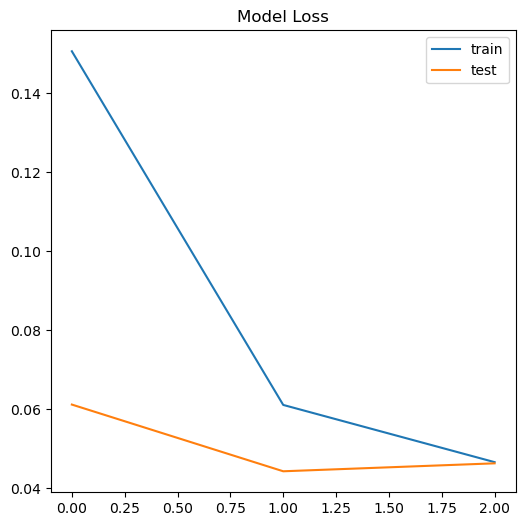

In [23]:
plt.figure(figsize = (6,6))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.title("Model Loss")
plt.show()

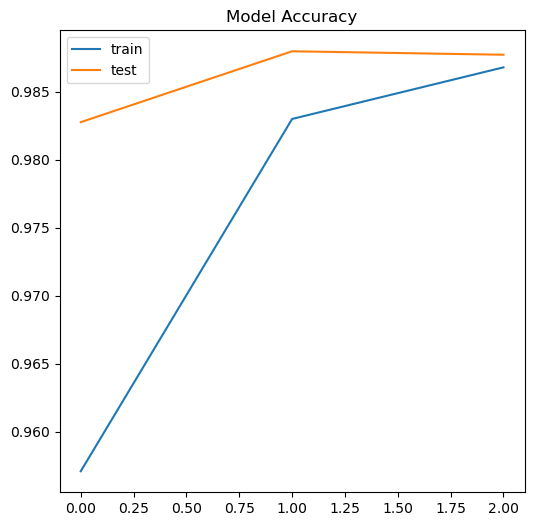

In [24]:
plt.figure(figsize = (6,6))
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.title("Model Accuracy")
plt.show()